## Importing Libraries

In [1]:


from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milivanili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/milivanili/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/milivanili/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#My file
myfile=open('20th_article_Wiki.txt', encoding='utf=8')


In [3]:
#Import csv file
path = '/Users/milivanili/20th_Century'

In [4]:
# Import txt file

with open('20th_article_Wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')


## Tokenization

In [5]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                       Appearance                 Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 The world at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914–1918)         1.1.2 The Russian Revolution and Communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictatorshi

In [6]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2', 'The', 'Russian', 'Revolution', 'and', 'Comm

In [7]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4884 samples and 21173 outcomes>


In [8]:
dist_words.most_common(10)

[('.', 1572),
 ('the', 1095),
 (',', 989),
 ('of', 604),
 ('and', 397),
 ('The', 331),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 291)]

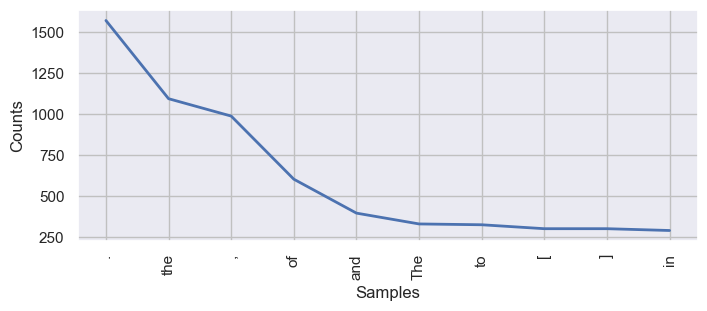

In [9]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stopwords

In [10]:
#Defining stopword

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'other', 'theirs', 'itself', 'more', 're', 'our', 'doesn', 'or', 'its', 'again', 'same', 'y', 'that', 'what', "shan't", 'been', 'a', 'ma', 'their', "hadn't", 'were', "hasn't", "that'll", 'with', 'be', 'out', "won't", 'it', 'and', 'how', "don't", "couldn't", 'yourself', 'am', 'through', 'than', 'was', "mustn't", 'own', 'because', 'shan', "you've", 'here', 'will', 'each', 't', 'mightn', 'didn', 'has', 'can', "should've", "aren't", 'when', 'down', "didn't", 'some', 'do', 'an', 'him', 'have', 'your', 'i', 'she', "wasn't", 'should', 'against', 'into', 'my', 'you', 'once', 'to', 'very', 'under', 'he', 'any', 'from', "doesn't", 'during', 'is', 'himself', 'wouldn', 'aren', 'don', 'this', 'too', 'between', 'mustn', 'where', 'the', 'ain', 'which', 'does', 'such', 'll', "wouldn't", "weren't", 'no', 'm', 'there', "haven't", 'after', 'in', 'but', 'doing', 'yourselves', 'only', 'few', 'who', 'further', 'up', 'they', 'just', 'why', 'haven', 'if', 'his', 'by', 'these', 'couldn', 've', 'hers', "you'll

In [11]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [12]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'file',
 'Search',
 'Search',
 'Appearance',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'The',
 'world',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2',
 'The',
 'Russian',
 'Revolution',
 'Communism',
 '1.2',
 'Between',
 'wars',
 '1.2.1',
 'Economic'

In [13]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4780 samples and 16511 outcomes>


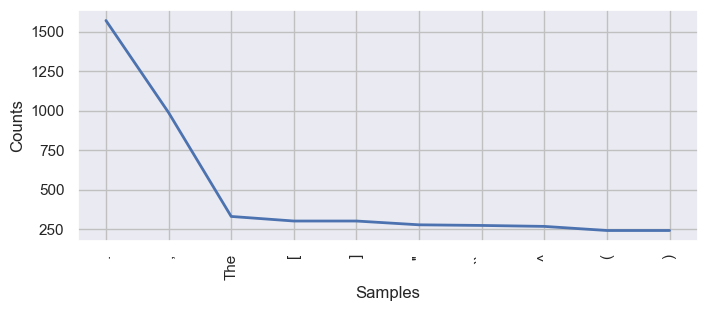

In [14]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [15]:
dist_words_filter

FreqDist({'.': 1572, ',': 989, 'The': 331, '[': 302, ']': 302, "''": 278, '``': 274, '^': 268, '(': 242, ')': 242, ...})

In [16]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [17]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Search    Search    Appearance    Create    account    Log    Personal    tools    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           The    world    beginning    century                   The    war    end    wars               World    War    I                                    The    Russian    Revolution    Communism           Between    wars             Economic    depression             The    rise    dictatorship           Global    war         Wor

In [18]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', '

In [19]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2) 


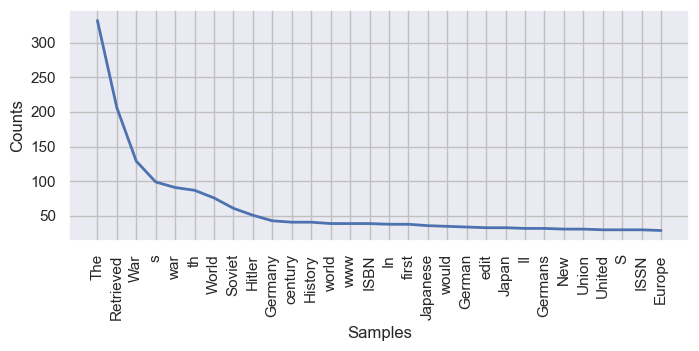

In [20]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [21]:
dist_words_filter_2.most_common(20)

[('The', 332),
 ('Retrieved', 206),
 ('War', 129),
 ('s', 99),
 ('war', 91),
 ('th', 87),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 51),
 ('Germany', 43),
 ('century', 41),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34)]

## Pos Tags with TextBlob

In [22]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [23]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [24]:
%%time
text = TextBlob(str(filtered))

CPU times: user 8.1 ms, sys: 155 μs, total: 8.25 ms
Wall time: 2.86 ms


In [25]:
text

TextBlob("['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'P

In [26]:
tags_list = text.tags

In [27]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS

In [28]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [29]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [30]:
df_t = df_text.groupby('Word type').count().reset_index()

In [31]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,14
3,EX,12
4,FW,43


In [32]:
top20 = df_t.nlargest(20, 'Words')

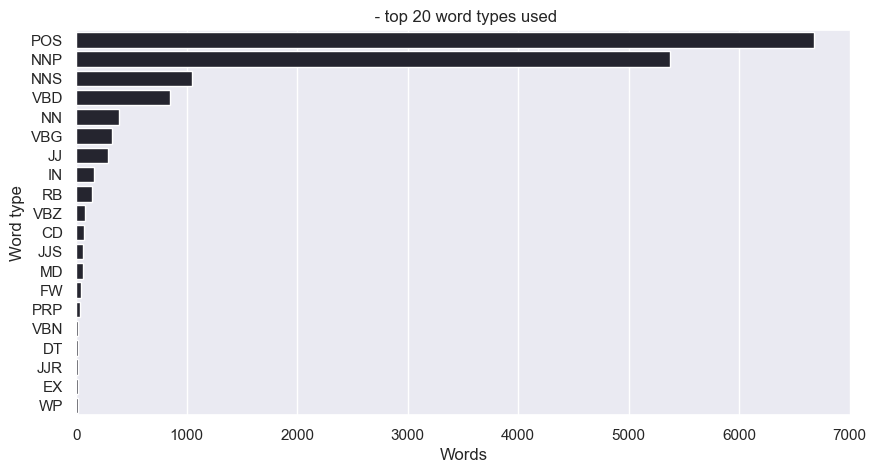

In [33]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title(" - top 20 word types used")

## NOUNS

In [34]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [35]:
top10

,Word,Occurences
1258,'War,129
2580,'war,91
2499,'th,87
1305,'World,76
1105,'Soviet,61
536,'Hitler,51
535,'History,41
1495,'century,41
2613,'www,39
558,'ISBN,39


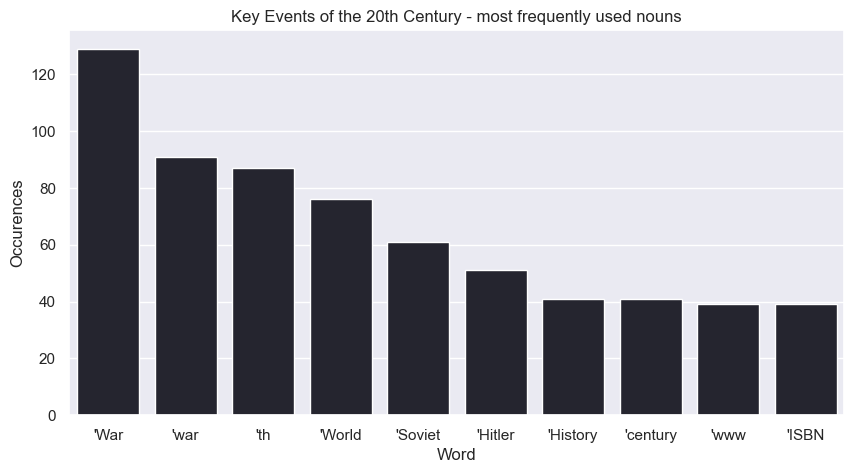

In [36]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top10).set_title("Key Events of the 20th Century - most frequently used nouns")

## Verbs

In [37]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [38]:
top10

,Word,Occurences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
307,'turned,7


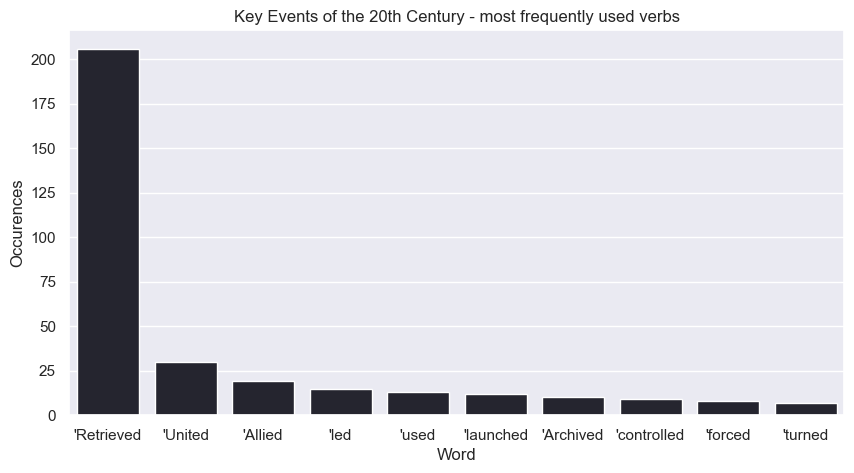

In [39]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10).set_title("Key Events of the 20th Century - most frequently used verbs")

## Adjectives

In [40]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [41]:
top10

,Word,Occurences
28,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
43,'Russian,6
1,'African,6
104,'political,6
105,'possible,5
7,'Baltic,5


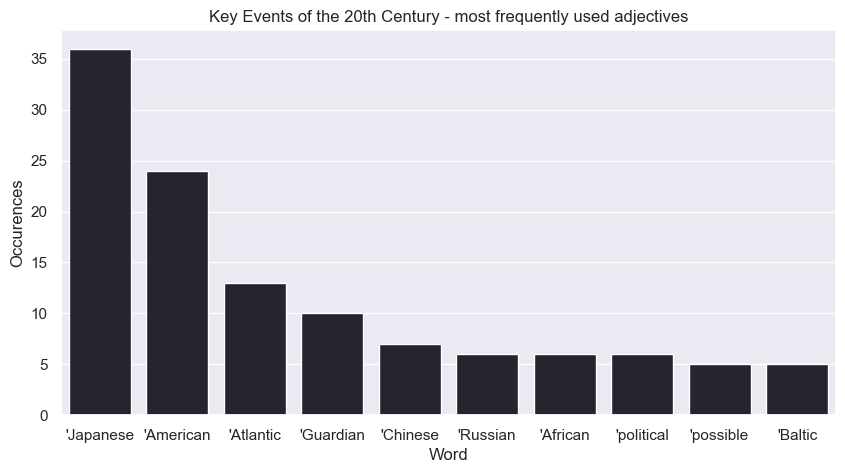

In [42]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Key Events of the 20th Century - most frequently used adjectives")

### Counting character occurences

In [43]:
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events th century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Appearance Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events th century Toggle Historic events th century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table 

In [44]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [45]:
all_counts

Counter({'Retrieved': 206,
         'War': 129,
         'war': 91,
         'th': 87,
         'World': 76,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'century': 41,
         'History': 41,
         'world': 39,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'history': 24,
         'This': 24,
         'American': 24,
         'weapons': 24,
         'attack': 23,
         'Main': 22,
         'Holocaust': 22,
         'new': 22,
         'St

In [46]:
chars = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [47]:
chars.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


chars["country_name"] = chars["country_name"].str.strip()

In [48]:
chars["country_name"] = chars["country_name"].str.strip()

In [49]:
country_list = chars['country_name'].to_list()

In [50]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [51]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [52]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [53]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df = df.transpose().reset_index()

In [55]:
df.dtypes

index    object
0         int64
dtype: object

In [56]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [57]:
df.rename(columns = {"index":"Countries", 0:"Times mentioned"}, inplace = True)

In [58]:
df

,Countries,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [59]:
df_sorted = df.sort_values(by=["Times mentioned", "Countries"], ascending=[False, True])


In [60]:
df_sorted.head(50)

,Countries,Times mentioned
64,Germany,43
85,Japan,33
60,France,16
82,Italy,14
140,Poland,13
191,Vietnam,13
144,Russia,10
76,India,9
9,Austria,5
99,Libya,5


In [61]:
df_sorted.shape

(208, 2)

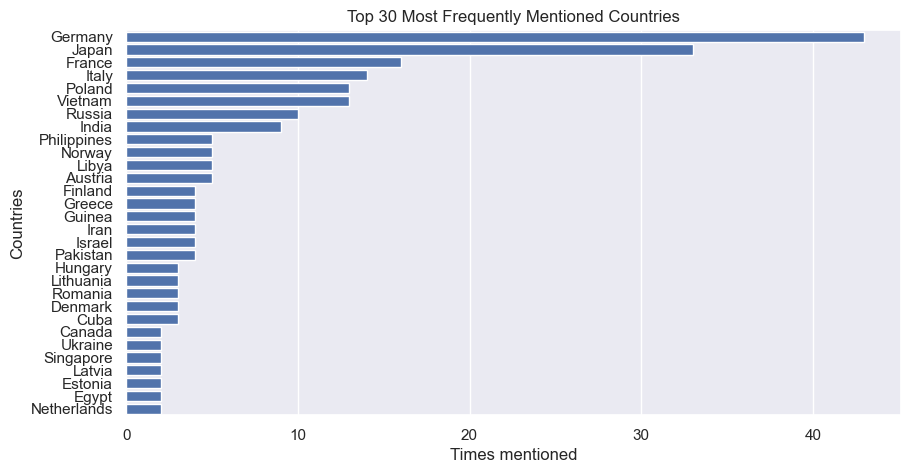

In [62]:

df_top30 = df_sorted.sort_values("Times mentioned", ascending=False).head(30)

plt.figure(figsize=(10, 5))
sns.barplot(x="Times mentioned", y="Countries", 
            saturation=0.9, 
            data=df_top30).set_title("Top 30 Most Frequently Mentioned Countries")

plt.show()


In [63]:
chars.to_csv("countries_count.csv")

The historical document analysis found that Germany was mentioned most frequently (43 times), reflecting its central role in 20th-century events, particularly in the World Wars. Japan followed with 33 mentions, highlighting its impact during World War II and beyond. France, Italy, Poland, Vietnam, and Russia were also featured, indicating their historical significance. 



## SENTIMENT ANALYSIS

In [64]:
text_sent = TextBlob(str(filtered))

In [65]:
print(text_sent.sentiment)

Sentiment(polarity=0.049109843922238446, subjectivity=0.35331078210715594)
